# Start with importing and loading datasets

In [1]:
# import pandas, matplotlib, and train_test_split from scikit learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
data = pd.read_csv("crx.csv")
data.tail()

,b,30.83,0,u,g,w,v,1.25,t,t.1,1,f,g.1,202,0.1,+
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-
688,b,35,3.375,u,g,c,h,8.29,f,f,0,t,g,0,0,-


In [3]:
cols = [
    'Gender','Age','Debt','Married','BankCustomer','EducationLevel','Ethnicity',
        'YearsEmployed','PriorDefault','Employed','CreditScore','DriversLicense','Citizen',
        'ZipCode','Income','ApprovalStatus'
]

data.columns = cols

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          689 non-null    object 
 1   Age             689 non-null    object 
 2   Debt            689 non-null    float64
 3   Married         689 non-null    object 
 4   BankCustomer    689 non-null    object 
 5   EducationLevel  689 non-null    object 
 6   Ethnicity       689 non-null    object 
 7   YearsEmployed   689 non-null    float64
 8   PriorDefault    689 non-null    object 
 9   Employed        689 non-null    object 
 10  CreditScore     689 non-null    int64  
 11  DriversLicense  689 non-null    object 
 12  Citizen         689 non-null    object 
 13  ZipCode         689 non-null    object 
 14  Income          689 non-null    int64  
 15  ApprovalStatus  689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [5]:
# Create a function to introduce missing number to the dataset
import numpy as np
import pandas as pd

def introduce_missing_data(df, proportion=0.1, exclude_columns=None, random_state=None):
    """
    Randomly introduces missing values (NaN) into a dataset.
    
    Parameters:
        df (pd.DataFrame): The dataset to modify.
        proportion (float): Proportion of total observations to set as missing (default: 0.01 or 1%).
        exclude_columns (list): List of columns to exclude from missing data insertion (default: None).
        random_state (int): Seed for reproducibility (default: None).
        
    Returns:
        pd.DataFrame: Dataset with missing values introduced.
    """
    if exclude_columns is None:
        exclude_columns = []
        
    if random_state is not None:
        np.random.seed(random_state)
    
    df = df.copy()  # Make a copy to avoid modifying the original dataset
    total_cells = df.size
    n_missing = int(total_cells * proportion)
    
    # Flatten the DataFrame into row, column index pairs
    valid_columns = [col for col in df.columns if col not in exclude_columns]
    if not valid_columns:
        raise ValueError("All columns are excluded from missing data introduction.")
    
    rows, cols = df.shape
    flat_indices = [(i, j) for i in range(rows) for j in range(cols) if df.columns[j] in valid_columns]
    selected_indices = np.random.choice(len(flat_indices), n_missing, replace=False)
    
    # Introduce missing values
    for index in selected_indices:
        i, j = flat_indices[index]
        df.iat[i, j] = np.nan
    
    return df


In [6]:
modified_data = introduce_missing_data(data, proportion=0.1, exclude_columns=['ApprovalStatus'], random_state=42)
modified_data.head()
modified_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          613 non-null    object 
 1   Age             612 non-null    object 
 2   Debt            618 non-null    float64
 3   Married         611 non-null    object 
 4   BankCustomer    614 non-null    object 
 5   EducationLevel  611 non-null    object 
 6   Ethnicity       620 non-null    object 
 7   YearsEmployed   599 non-null    float64
 8   PriorDefault    617 non-null    object 
 9   Employed        628 non-null    object 
 10  CreditScore     619 non-null    float64
 11  DriversLicense  622 non-null    object 
 12  Citizen         610 non-null    object 
 13  ZipCode         615 non-null    object 
 14  Income          624 non-null    float64
 15  ApprovalStatus  689 non-null    object 
dtypes: float64(4), object(12)
memory usage: 86.3+ KB


In [13]:
modified_data.shape

(689, 16)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    modified_data.drop("ApprovalStatus", axis=1),
    modified_data['ApprovalStatus'],
    test_size=0.32,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((468, 15), (221, 15), (468,), (221,))

In [16]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 23 to 102
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          414 non-null    object 
 1   Age             417 non-null    object 
 2   Debt            419 non-null    float64
 3   Married         415 non-null    object 
 4   BankCustomer    421 non-null    object 
 5   EducationLevel  415 non-null    object 
 6   Ethnicity       418 non-null    object 
 7   YearsEmployed   409 non-null    float64
 8   PriorDefault    415 non-null    object 
 9   Employed        425 non-null    object 
 10  CreditScore     422 non-null    float64
 11  DriversLicense  419 non-null    object 
 12  Citizen         415 non-null    object 
 13  ZipCode         416 non-null    object 
 14  Income          421 non-null    float64
dtypes: float64(4), object(11)
memory usage: 58.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 286 to 79
Data columns

(None, None)

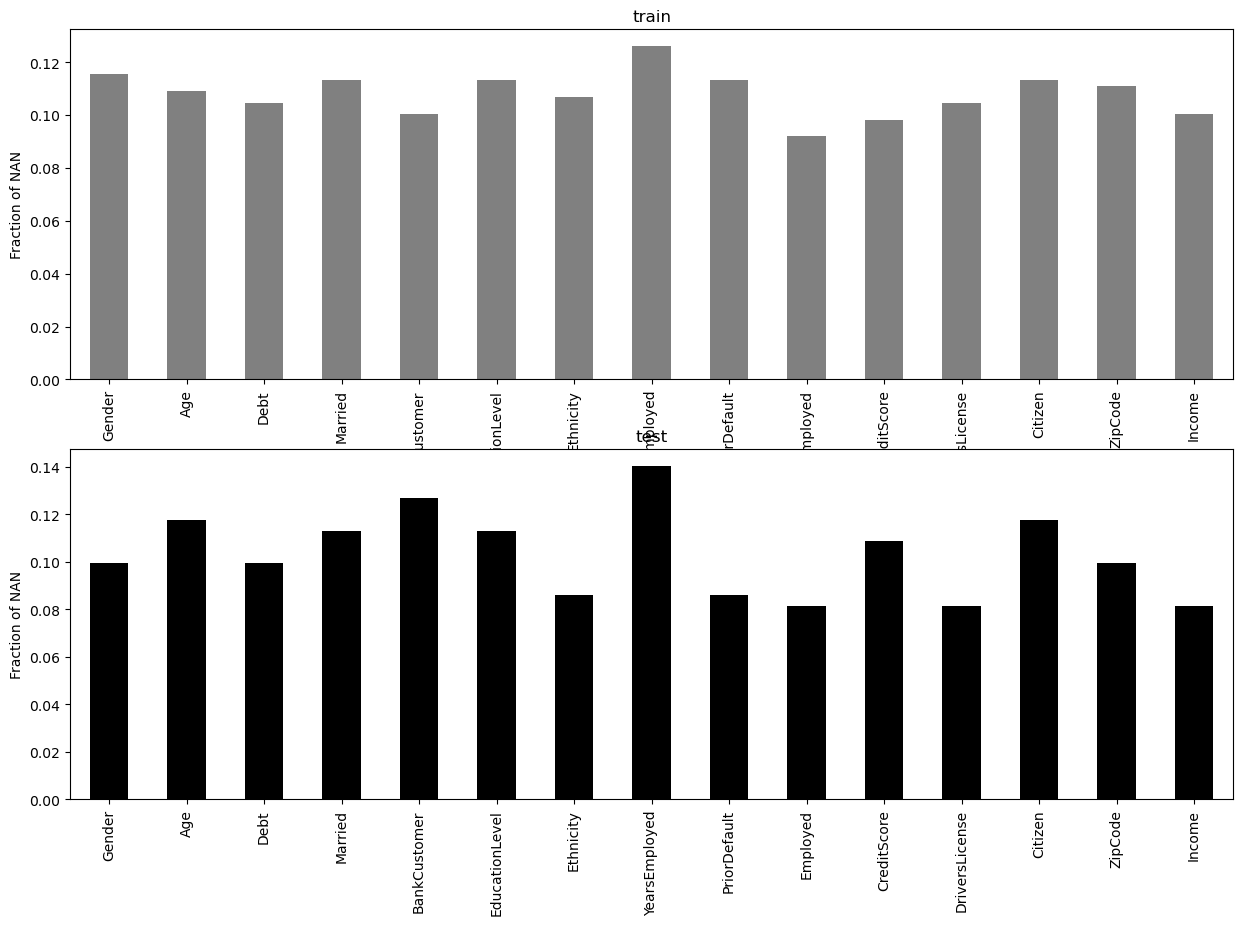

In [17]:
# Make a bar plot with the proportion of missing data in the variable for both train and test sets
# fig, axes = plt.subplots(
#     2, 1, figsize=(15, 10), squeeze=False
# )

# X_train.isnull().mean().plot(
#     kind='bar', color='grey', ax=axes[0,0], title="train"
# )
# X_test.isnull().mean().plot(
#     kind='bar', color='black', ax=axes[1,0], title='test'
# )

# axes[0,0].set_ylabel("Fraction of Missing Data")
# axes[1,0].set_ylabel("Fraction of Missing Data")

# plt.show();

fig, axes = plt.subplots(2, 1, figsize=(15, 10), squeeze=False)

X_train.isnull().mean().plot(
    kind='bar', color='grey', ax=axes[0, 0], title="train")
X_test.isnull().mean().plot(
    kind='bar', color='black', ax=axes[1, 0], title="test")

axes[0, 0].set_ylabel('Fraction of NAN')
axes[1, 0].set_ylabel('Fraction of NAN')

plt.show()

In [18]:
# Drop the missing number from both train and test set
train_cca = X_train.dropna()
test_cca = X_test.dropna()

In [19]:
# Check the length of both original and complete case dataset
print(f"Total observation: ", {len(X_train)})
print(f"Obervation without nan: ", {len(train_cca)})

Total observation:  {468}
Obervation without nan:  {82}


In [20]:
# After removing the observation, we align the target variable
y_train_cca = train_cca.loc[train_cca.index]
y_test_cca = test_cca.loc[test_cca.index]

# We would try dropping missing observation using feature engine method

In [22]:
from feature_engine.imputation import DropMissingData

In [23]:
# Set up imputer to automatically find missing data
cca = DropMissingData(variables=None, missing_only=True)

cca.fit(X_train)

DropMissingData()

In [25]:
cca.variables_

['Gender',
 'Age',
 'Debt',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'YearsEmployed',
 'PriorDefault',
 'Employed',
 'CreditScore',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'Income']

In [26]:
# Remove rows with missing data in both the train and test
train_cca = cca.transform(X_train)
test_cca = cca.transform(X_test)

# Check to confirm whether there is any missing observation
train_cca.isnull().sum()
test_cca.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
dtype: int64

In [27]:
# Adjust target (y data sets) after removing the missing observation from training test by DropMissingData
train_c, y_train_c = cca.transform_x_y(X_train, y_train)
test_c, y_test_c = cca.transform_x_y(X_test, y_test)